# Analysis of first image of CTIO data 2016


I use this analysis

https://github.com/sylvielsstfr/MonoCamMay2016/blob/master/MyReduction_2016_05_11/ExtractSpectrum_From_HD158485_grat.ipynb

In [360]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [361]:
from scipy import stats  
from scipy import ndimage
import os
from datetime import datetime, timedelta

In [362]:
import bottleneck as bn  # numpy's masked median is slow...really slow (in version 1.8.1 and lower)
print 'bottleneck version',bn.__version__

bottleneck version 1.0.0


In [363]:
import photutils
from astropy.stats import sigma_clipped_stats
from photutils import daofind
from photutils import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.background import Background2D

In [364]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [365]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2016-11-04 15:43:55.063669
fits date format for the analysis :  2016-11-04T15:43:55


In [366]:
path_img='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016'
file_img='fileno016.fits'
object_name='fileno016'

In [367]:
fullfile=os.path.join(path_img,file_img)

In [368]:
prim_hdr=fits.getheader(fullfile) # 

In [369]:
#exposure = prim_hdr['EXPOSURE']
date_obs = prim_hdr['DATE-OBS']

In [370]:
print date_obs
#print 'exposure = ',exposure,'seconds'

2016-08-23T02:55:43.922


In [371]:
hdu_list=fits.open(fullfile)
hdu_list.info()

Filename: /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/fileno016.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     135   (2168, 2048)   int16 (rescales to uint16)   


In [372]:
header=hdu_list[0].header
#header

In [373]:
image_data = hdu_list[0].data

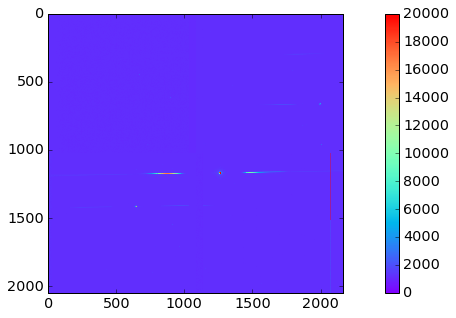

In [374]:
im=plt.imshow(image_data,cmap='rainbow',vmin=0,vmax=20000)
plt.colorbar(im)

In [375]:
import pyds9
import os

In [376]:
print(pyds9.ds9_targets())

['DS9:ds9 869e5a58:52134']


In [377]:
d = pyds9.DS9()

In [378]:
# define the zoom
ds9command='zoom 0.125'
d.set(ds9command)
# set the scale
ds9command='scale histequ zscale'
d.set(ds9command)

#ds9command='frame '+ str(channel)
#d.set(ds9command)    
# set the scale
#ds9command='scale histequ'
#d.set(ds9command)
#ds9command='scale zscale'
#d.set(ds9command)
# set the color
#ds9command='cmap rainbow'
#d.set(ds9command)
## define the image
#filelist=fullfilepath+'['+str(channel) + ']' 
ds9command = 'file '+ fullfile
d.set(ds9command)  # send the file to the open ds9 session


1

In [379]:
print(type(image_data))
print(image_data.shape)
themin=image_data.min()
themax=image_data.max()
print(themin,themax)

<type 'numpy.ndarray'>
(2048, 2168)
(771, 62969)


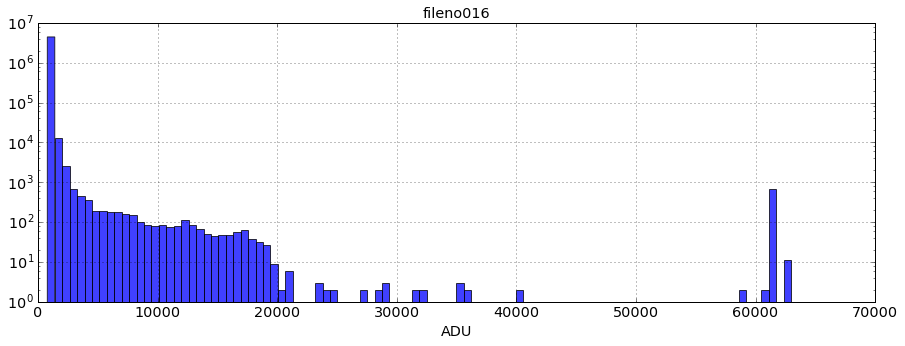

In [380]:
title=object_name
fig = plt.figure()
ax = fig.add_subplot(111)
image_data_flat=image_data.flatten()
plt.hist(image_data_flat,bins=100,facecolor='blue', alpha=0.75);
ax.set_title(title)
ax.set_xlabel('ADU')
ax.grid(True)
plt.yscale('log')
plt.show()

In [381]:
ccd=ccdproc.CCDData.read(fullfile, hdu=0,unit="adu") 

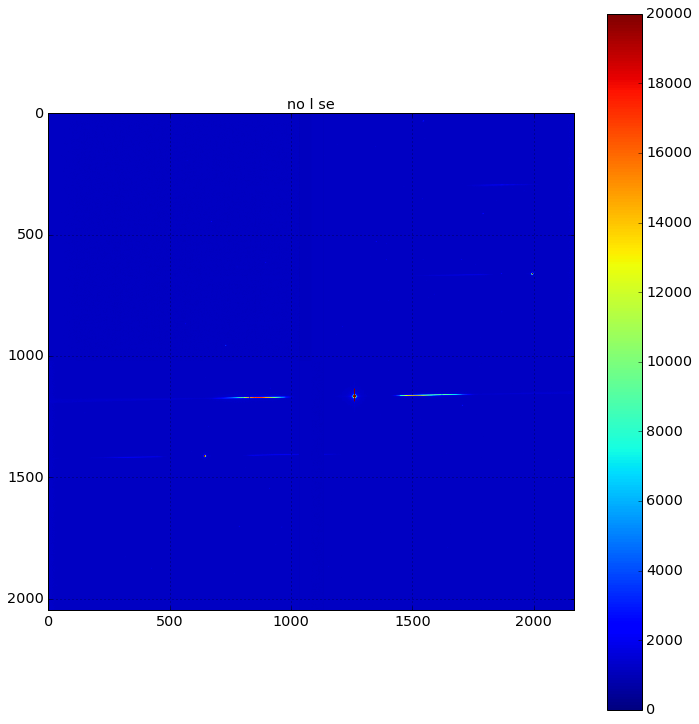

In [382]:
ig, ax = plt.subplots(figsize=(10, 10))
img=ax.imshow(ccd,vmin=0,vmax=20000.)
plt.title('no l se')
plt.tight_layout()
plt.colorbar(img)
plt.grid(True)
plt.savefig(object_name)

In [383]:
bkg = Background2D(ccd, (100, 100), filter_size=(3, 3),method='median')

In [384]:
print('median background = ',bkg.background_median)
print('median rms = ',bkg.background_rms_median)

('median background = ', 1204.25)
('median rms = ', 6.1219497530792726)


In [385]:
ccd_bgsub=ccd - bkg.background

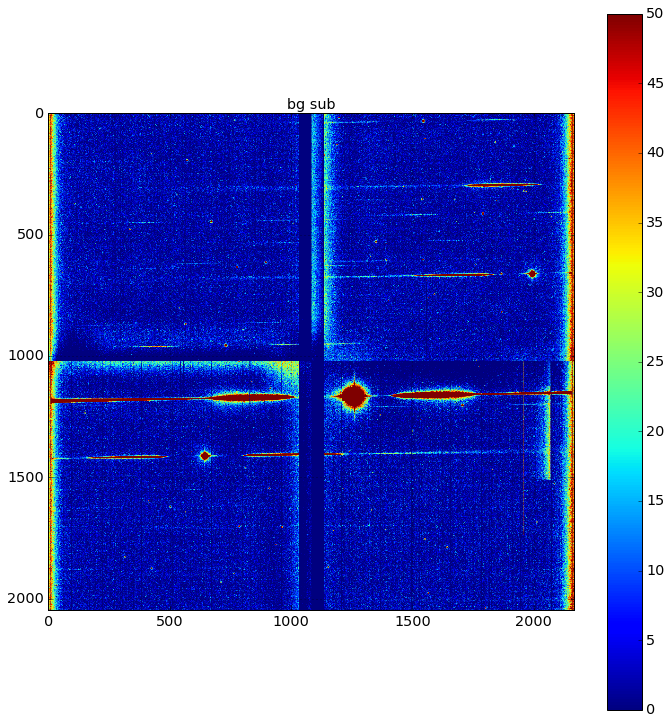

In [386]:
fig, ax = plt.subplots(figsize=(10, 10))
img=ax.imshow(ccd_bgsub,vmin=0,vmax=50.)
plt.title('bg sub')
plt.tight_layout()
plt.colorbar(img)
plt.grid(True)
plt.savefig('imagebgsub')

In [387]:
rotated_image=ndimage.interpolation.rotate(ccd_bgsub,-1)

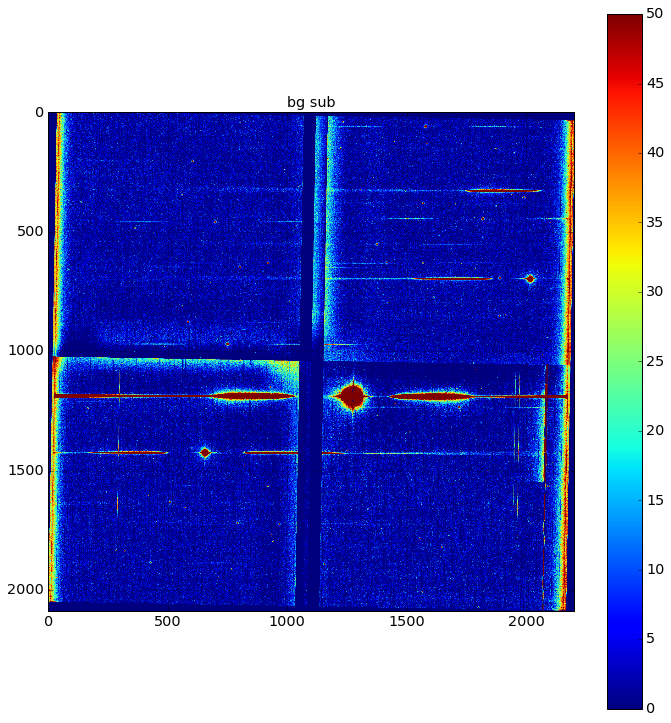

In [388]:
fig, ax = plt.subplots(figsize=(10, 10))
img=ax.imshow(rotated_image,vmin=0,vmax=50.)
plt.title('bg sub')
plt.tight_layout()
plt.colorbar(img)
plt.grid(True)
plt.savefig('imagerot')

In [389]:
themaximum=rotated_image.max()

In [390]:
imax,jmax = np.unravel_index(rotated_image.argmax(),rotated_image.shape)
print imax,' ',jmax

1210   1275


In [391]:
rotated_image.shape

(2086, 2203)

In [392]:
max_index_y=rotated_image.shape[0]-1
max_index_x=rotated_image.shape[1]-1

In [393]:
imax=1190
w=5

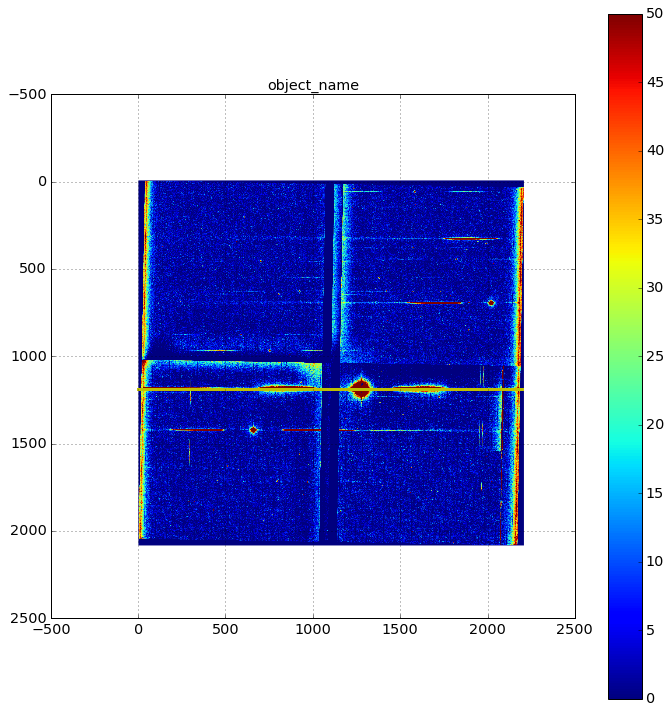

In [394]:
# check the central region is OK
# -------------------------------
fig, ax = plt.subplots(figsize=(10, 10))
img=ax.imshow(rotated_image,vmin=0,vmax=50.)
plt.colorbar(img)
ax.plot([0, max_index_x], [imax-w, imax-w], color='y', linestyle='-', linewidth=2)
ax.plot([0,max_index_x], [imax+w, imax+w], color='y', linestyle='-', linewidth=2)
plt.title('object_name')
plt.tight_layout()
plt.grid(True)
#plt.savefig(outputfigfilename4)

In [395]:
profile1=np.sum(rotated_image[:,700:1000],axis=0)
profile2=np.sum(rotated_image[:,1200:1300],axis=0)
profile3=np.sum(rotated_image[:,1300:1800],axis=0)

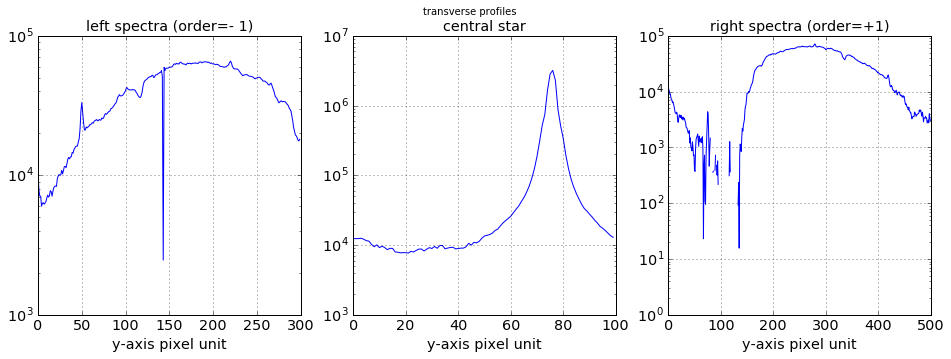

In [396]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16.,5))
ax1.semilogy(profile1)
ax2.semilogy(profile2)
ax3.semilogy(profile3)
#ax1.plot(profile1)
#ax2.plot(profile2)
#ax3.plot(profile3)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax1.set_title('left spectra (order=- 1)')
ax2.set_title('central star')
ax3.set_title('right spectra (order=+1)')
ax1.set_xlabel('y-axis pixel unit')
ax2.set_xlabel('y-axis pixel unit')
ax3.set_xlabel('y-axis pixel unit')
plt.suptitle('transverse profiles')

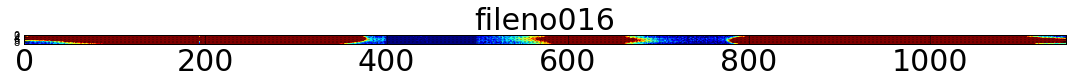

In [397]:
fig, ax = plt.subplots(figsize=(15, 5))
spectraregion=np.copy(rotated_image[imax-w:imax+w,650:1800])
ax.imshow(spectraregion,vmin=0,vmax=100.)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=10)
ax.grid(True)
plt.title(object_name,fontsize=30)
plt.tight_layout()

In [398]:
spectrum=np.sum(spectraregion,axis=0)

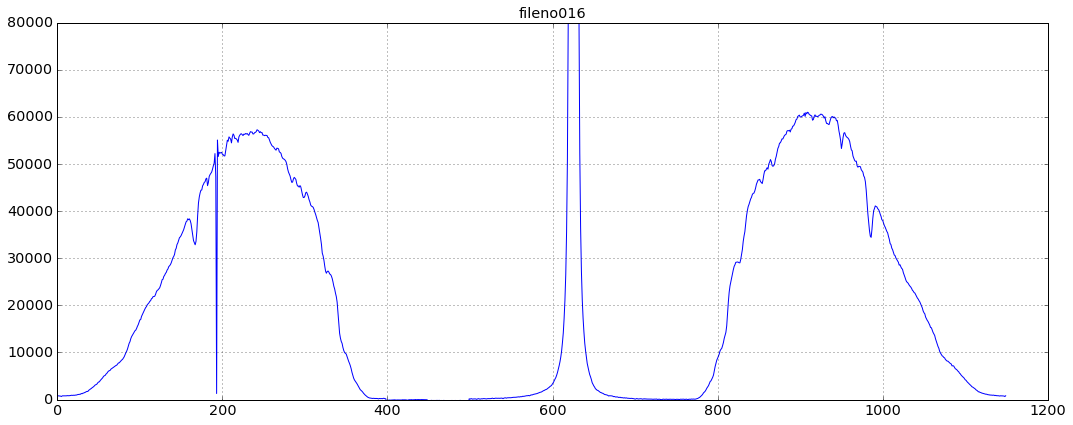

In [399]:
fig, ax = plt.subplots(figsize=(15, 6))
#plt.semilogy(spectrum)
plt.plot(spectrum)
plt.ylim(-50.,80000.)
plt.title(object_name)
plt.tight_layout()
#plt.xlim(0.,1000.)
plt.grid(True)
#plt.savefig(outputfigfilename6)
